\***\*============================GRAPH PREPROCESSING============================**


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from random import randint
import time
import math
from math import isclose
import plotly.graph_objects as go
from itertools import combinations
from itertools import product



### GRAPH PROCESSING

In [2]:
# # open preprocessing time file
# with open("processing_times.txt", "rb") as f:
#     pptime_file = f.read() 

# G_time = time.time()

# G = nx.Graph()

# # Read the file and create edges with random weights
# file_path = '../small_dataset.txt'  # Replace with the actual file path
# # edges = []
# with open(file_path, 'r') as file:
#     file_contents = file.readlines()
#     num_lines = len(file_contents)
#     print(f"Number of lines: {num_lines}")
#     for i, line in enumerate(file_contents):
#         node1, node2 = map(int, line.split())
#         weight = float(randint(1, 99)) + ((i+1) * (1 / (num_lines -1)))
#         G.add_edge(node1, node2, weight=weight)
        

# with open('graph.pkl', 'wb') as f:
#     pickle.dump(G, f)

# G_process_time = time.time() - G_time  
    


# d_time = time.time()    
# D = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
# with open('D.pkl', 'wb') as f:
#     pickle.dump(D, f)
    
# d_process_time = time.time() - d_time   


# with open('processing_times.txt', 'w') as time_file:
#     time_file.write(f"Graph processing time: {G_process_time:.6f} seconds\n")
#     time_file.write(f"Dijkstra processing time: {d_process_time:.6f} seconds\n")

# def store_shortest_paths(G):
#     # Use NetworkX's built-in function to compute all pairs shortest paths
#     all_pairs_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))
    
#     # Flatten the dictionary to match the desired output format
#     shortest_paths = {}
#     for u, paths in all_pairs_paths.items():
#         for v, path in paths.items():
#             shortest_paths[(u, v)] = path
    
#     return shortest_paths

# # Example usage

# st_time = time.time()   
# shortest_paths = store_shortest_paths(G)


# with open('shortest_paths.pkl', 'wb') as f:
#     pickle.dump(shortest_paths, f)
# st_process_time = time.time() - st_time
# with open('processing_times.txt', 'a') as time_file:
#     time_file.write(f"Shortest paths processing time: {st_process_time:.6f} seconds\n")   




In [3]:


# def create_interactive_graph(G):
#     # Create a spring layout for node positions
#     pos = nx.spring_layout(G)
    
#     # Create edge traces
#     edge_x = []
#     edge_y = []
#     edge_text = []
#     edge_weights = []
    
#     for edge in G.edges():
#         x0, y0 = pos[edge[0]]
#         x1, y1 = pos[edge[1]]
#         edge_x.extend([x0, x1, None])
#         edge_y.extend([y0, y1, None])
#         weight = G.edges[edge]['weight']
#         edge_weights.append(weight)
#         edge_text.append(f"Weight: {int(weight)}")
    
#     edge_trace = go.Scatter(
#         x=edge_x, y=edge_y,
#         line=dict(width=2, color='#888'),
#         hoverinfo='text',
#         text=edge_text,
#         mode='lines+text',
#         textposition='middle center',
#         textfont=dict(size=10)
#     )
    
#     # Add edge weight annotations
#     annotations = []
#     for edge in G.edges():
#         x0, y0 = pos[edge[0]]
#         x1, y1 = pos[edge[1]]
#         weight = G.edges[edge]['weight']
#         annotations.append(dict(
#             x=(x0 + x1) / 2,
#             y=(y0 + y1) / 2,
#             xref='x',
#             yref='y',
#             text=str(int(weight)),
#             showarrow=False,
#             font=dict(size=10)
#         ))
    
#     # Create node traces
#     node_x = []
#     node_y = []
#     node_text = []
    
#     for node in G.nodes():
#         x, y = pos[node]
#         node_x.append(x)
#         node_y.append(y)
#         node_text.append(f"Node: {node}")
    
#     node_trace = go.Scatter(
#         x=node_x, y=node_y,
#         mode='markers+text',
#         hoverinfo='text',
#         text=[str(node) for node in G.nodes()],
#         textposition='middle center',
#         marker=dict(
#             showscale=False,
#             color='yellow',
#             size=40,
#             line_width=2,
#             line=dict(color='black', width=1)
#         ),
#         textfont=dict(size=12)
#     )
    
#     # Create the figure with larger size
#     fig = go.Figure(
#         data=[edge_trace, node_trace],
#         layout=go.Layout(
#             title='Interactive Graph Visualization',
#             showlegend=False,
#             hovermode='closest',
#             margin=dict(b=20, l=20, r=20, t=40),
#             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             plot_bgcolor='white',
#             width=1200,  # Increased width
#             height=800,  # Increased height
#             annotations=annotations
#         )
#     )
    
#     return fig

# # Create and display the interactive graph
# fig = create_interactive_graph(G)
# fig.show(figsize=(40, 40))

### LOAD DATA STRUCTURE 


In [4]:
# Load G , D and shortest_paths from the pickle files
with open('graph.pkl', 'rb') as f:
    G = pickle.load(f)
    
with open('D.pkl', 'rb') as f:
    D = pickle.load(f)
    
with open('shortest_paths.pkl', 'rb') as f:
    shortest_paths = pickle.load(f) 
    
with open('txu_dict.pkl', 'rb') as f:
    txu_dict = pickle.load(f) 

# load maximizer_dict from the local file   
with open('maximizer_dict.pkl', 'rb') as f:
    maximizer_dict = pickle.load(f)

---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [5]:


def floor_power_of_2(x):
    if x <= 0:
        return 0 # Return 1 for non-positive input
    elif math.isinf(x):
        return float("inf")  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

In [6]:
from math import isclose

def single_edge_in_path(p, F):
    if not p or len(p) < 2 or not F:
        return False

    s, t = p[0], p[-1]
    p_dist = D[s][t]

    def edge_on_path(u, v):
    
        
        wt = G[u][v]['weight']
        
        if u not in D[s] or v not in D[s] or u not in D[t] or v not in D[t]:
            return False
        if D[s][u] == float('inf') or D[s][v] == float('inf') or D[v][t] == float('inf') or D[u][t] == float('inf'):
            return False
        

        return (
            isclose(D[s][u] + wt + D[v][t], p_dist) or
            isclose(D[s][v] + wt + D[u][t], p_dist)
        )


    for edge in F:
        u, v = edge
        if edge_on_path(u, v):
            return True

    return False


--------------------------------FIND_JUMP FUNCTION--------------------------------


In [7]:
def FINDJUMP(P, F):
    X = []  # Initialie X
    if not P:
        return[]
    x = P[0]
    X.append(x)
    vertices = []
    for edge in F:
        u, v = edge
        vertices.append(u)
        vertices.append(v)
    vertices = list(set(vertices))

    while True:
        
        u = min(vertices, key=lambda v: floor_power_of_2(D[x][v] if v in D[x] else float('inf')))
        
        distance= max(1, floor_power_of_2(D[x][u]))

        y = None
        for vertex in P[P.index(x) + 1:]:
            if D[x][vertex] >= distance:
                y = vertex
                break  
        if y is not None:
            X.append(y)
            x = y
        else:
            break
    return X 

### ------------------------------MAXIMIZER FUNCTION--------------------------------



In [8]:

def maximizer(G, x, y, d1, d2):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None


    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edges_set.add((u, v))

    for u, v in edges_set:
        # if get_distance_cached(x, u) >= d1 and get_distance_cached(y, v) >= d2:
        #     max_edges.add((u, v))
        if (D[x][u] >= d1 and D[y][v] >= d2) :
        
            max_edges.add((u, v))   

    max_xy_distance = float('-inf')
    for u, v in max_edges:
        edge_data = G.get_edge_data(u, v)
        # if G.has_edge(u, v):
        #     G.remove_edge(u, v)
        G.remove_edge(u, v)
        # D = preprocess_graph(G)
        # distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G, x, y):
            xy_path = nx.dijkstra_path(G, x, y, weight='weight')
            max_uv_distance = sum(
                G[xy_path[j]][xy_path[j + 1]]['weight']
                for j in range(len(xy_path) - 1)
            )
            if max_uv_distance > max_xy_distance:
                max_xy_edge = (u, v)
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        G.add_edge(u, v, **edge_data)   

    if max_xy_path is None or len(max_xy_path) < 2:
        return max_xy_edge, [max_xy_path] if max_xy_path else []

    s = 0  # Start index of current subpath
    max_xy_path_new = []
    deviation_found = False

    for i in range(len(max_xy_path) - 1):
        u = max_xy_path[s]
        v = max_xy_path[i + 1]
        
        # Direct shortest path distance
        uv_distance = D[u][v]   
        
        # Path distance along max_xy_path from u to v
        uv_path_distance = sum(
            G[max_xy_path[j]][max_xy_path[j + 1]]['weight']
            for j in range(s, i + 1)
        )
   
        
        # Check if path deviates from shortest path
        if uv_distance < uv_path_distance:
            deviation_found = True
            # Define nodes: s (start), a (before deviation), b (deviation), t (end)
            s_node = max_xy_path[0]  # Start node
            a = max_xy_path[i] if i > 0 else max_xy_path[0]  # Node before deviation
            b = v  # Deviation node
            t = max_xy_path[-1]  # End node
            # Construct the output: [[s, a], (a, b), [b, t]]
            s_to_a = [s_node, a]  # Exactly [s, a]
            a_to_b = (a, b)  # Edge from a to b
            b_to_t = [b, t]  # Exactly [b, t]
            max_xy_path_new = [s_to_a, a_to_b, b_to_t]
            break
    
    # If no deviation, return original path wrapped in a list
    if not deviation_found:
        max_xy_path_new = [max_xy_path]
    
    return max_xy_edge, max_xy_path_new

### ==========MAXIMIZER Storage================


In [9]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in D.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [10]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = [0]
i = floor_power_of_2((max_d_value))


while i >= 1:
    d1_d2_list.append(i)
    i //= 2
# print(max_d_value)

### Mximizer storing code

In [11]:
# import logging
# from tqdm import tqdm

# # Setup logging to file
# logging.basicConfig(filename='maximizer_progress.log', level=logging.INFO, 
#                     format='%(asctime)s %(levelname)s:%(message)s')

# maximizer_time = time.time()
# maximizer_dict = {}
# nodes = list(G.nodes())

# # Calculate total iterations for tqdm
# total = sum(1 for x in nodes for y in nodes if x != y) * len(d1_d2_list) * len(d1_d2_list)

# with tqdm(total=total, desc="Maximizer Progress") as pbar:
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         max_xy_edge, max_xy_path_new = maximizer(G, x, y, d1, d2)
#                         msg = (f"pair: ({x}, {y}), d1: {d1}, d2: {d2}, "
#                                f"max_xy_edge: {max_xy_edge}, max_xy_path_new: {max_xy_path_new}")
#                         print(msg)
#                         logging.info(msg)
#                         maximizer_dict[(x, y, d1, d2)] = (max_xy_edge, max_xy_path_new)
#                         pbar.update(1)

# maximizer_process_time = time.time() - maximizer_time
# print(f"Maximizer processing time: {maximizer_process_time:.6f} seconds")
# logging.info(f"Maximizer processing time: {maximizer_process_time:.6f} seconds")
# with open('processing_times.txt', 'a') as time_file:
#     time_file.write(f"Maximizer processing Time without multiProcessing: {maximizer_process_time:.6f} seconds\n")

In [12]:
# import networkx as nx
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import tqdm # Import tqdm to display a progress bar


# # Initialize a dictionary to store the maximizer output
# maximizer_dict = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair(G, x, y, d1, d2):
#     try:
#         result = maximizer_function(G, x, y, d1, d2)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, d2), None

# # Use ThreadPoolExecutor to parallelize the computation
# nodes = list(G.nodes)

# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         futures.append(executor.submit(process_pair, G, x, y, d1, d2))

#     for future in tqdm.tqdm(as_completed(futures), total=len(futures)):
#         key, result = future.result()
#         if result is not None:
#             maximizer_dict[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# with open('maximizer_dict.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict, f)
    

===============================MAIN: QUERY FUNCTION====================================


### Stable Version 


In [13]:
# from numpy import short


# def is_valid_path(G, path):
#     return all(G.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1)) and (
#         len(path) < 2 or G.has_edge(path[-2], path[-1])
#     )
# def remove_duplicates(lst):
#     seen = set()
#     result = []
#     for item in lst:
#         if item not in seen:
#             seen.add(item)
#             result.append(item)
#     return result
# def QUERY(G, s, t, e):
#     if e == []:
#         try:
#             return shortest_paths[(s, t)]
#         except KeyError:
#             print(f"Shortest path for ({s}, {t}) not found in shortest_paths.")
#             return []
#         # return shortest_paths[(s, t)]
#     # Check if the edge e is in the graph
#     if isinstance(e, list):
#         e.u, e.v = e
#     if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
#         # print("The edge to avoid is not in the graph.")
#         return shortest_paths[(s, t)]

#     # Check if there is a valid path between s and t
#     if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
#         print("There is no valid path between the source and destination vertices.")
#         return [], float("inf")
#     # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
#     JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
#     JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
#     # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
#     final_shortest_path = []
#     shortest_path_distance = float("inf")
#     for x in JUMP_st:
#         for y in JUMP_ts:
#             if x == y:
#                 continue
#             # print(f"x={x}, y={y}")
#             vertices = [e.u, e.v]

#             d1 = min(nearest_power_of_2(D[x][a]) for a in vertices   )

#             d2 = min(nearest_power_of_2(D[y][a]) for a in vertices) 
#             # print(f"d1={d1}, d2={d2}")
#             e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
#             # e_star, xy_e_star = maximizer(G , x, y, d1, d2)
            

#             if xy_e_star is None:
#                 xy_e_star = []
#             elif len(xy_e_star)> 2:
#                 # Flatten the list of lists
#                 xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
#                     # print(f"xy_e_star={xy_e_star}")
#                     xy_e_star[2][0], xy_e_star[2][1])]
#             else: 
#                 xy_e_star = xy_e_star[0]
#             sx_path = shortest_paths[(s, x)]
#             yt_path = shortest_paths[(y, t)]
#             # print(f"sx_path={sx_path}, yt_path={yt_path}")
#             # if sx_path is None or yt_path is None:
#             #     continue  # Skip if there is no valid path from s to x or y to t
#             if sx_path is None:
#                 sx_path = [x]
#             if yt_path is None:
#                 yt_path = [y]
            
#             p_distance = float("inf")
#             P = sx_path + xy_e_star[1:-1] + yt_path
#             # P = remove_duplicates(sx_path + xy_e_star + yt_path)
            
#             # if y==s and xy_e_star != []:
#             #     P = xy_e_star[::-1] + shortest_paths[(x, t)]
#             #     if x==t:
#             #         P = xy_e_star[::-1] 
#             # elif xy_e_star != [] and D[s][y] < D[x][s]:
#             #     P = shortest_paths[(s, y)] + xy_e_star[::-1] + shortest_paths[(x, t)]
#             #     if s in xy_e_star and xy_e_star.index(s) > 0:
#             #         s_index  = xy_e_star[::-1].index(s) 
#             #         p1 = xy_e_star[::-1][s_index:]    
#             #         p2 = shortest_paths[(x, t)]
#             #         P = p1 + p2
#             P = remove_duplicates(P)
            
#             # print(f"P={P}")
#             if not is_valid_path(G, P):
#                 continue
            
#             if is_valid_path(G, P):
#                 p_distance = sum(
#                     get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
#                 )

#             p_edges = [(P[i], P[i+1]) for i in range(len(P) - 1)]
#             if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and (p_distance < shortest_path_distance):
#                     final_shortest_path = P
#                     # print(f"shortest_path1={final_shortest_path}")
#                     shortest_path_distance = p_distance
#     return final_shortest_path

### BETA Version

In [14]:
def edge_in_fault_edge(F, e):
    for i in range(len(F)):
        if set((F[i][0], F[i][1])) == set(e):
            return True
    return False

In [15]:


def is_edge_on_shortest_path(G,  s, t, e):
    u , v = e
    # if not G.has_edge(u, v):
    #     return False
    wt = G[u][v]["weight"] 
    


    dst = D[s][t]
    
    if u not in D[s] or v not in D[s] or u not in D[t] or v not in D[t]:
        return False

    return (
        isclose(D[s][u] + wt + D[v][t], dst) or
        isclose(D[s][v] + wt + D[u][t], dst)
    )


def QUERY(G, s, t, e):
    if e == []:
        try:
            return shortest_paths[(s, t)], D[s][t]
        except KeyError:
            print(f"Shortest path for ({s}, {t}) not found in shortest_paths.")
            return [], float("inf") 

    # Check if the edge e is in the graph
    # if isinstance(e, list):
    #     e.u, e.v = e
    eu = e[0][0]
    ev = e[0][1]

    # if not (G.has_edge(eu, ev) or G.has_edge(ev, eu)):
    #     return shortest_paths[(s, t)]

    # Check if there is a valid path between s and t
    if (s, t) not in shortest_paths or shortest_paths[(s, t)] is None:
        # print("There is no valid path between the source and destination vertices.")
        return [], float("inf")

    if not is_edge_on_shortest_path(G, s, t , (eu, ev)):
        return shortest_paths[(s, t)], D[s][t]
    
    # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], e)
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], e)

    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
    final_shortest_path = []
    shortest_path_distance = float("inf")
    P = []
    p_distance = float("inf")
    processed = set()
    for x in JUMP_st:
        for y in JUMP_ts:
            if x == y or (x, y) in processed:
                continue
            # print(f"x={x}, y={y}")
            # e is list of tuples make vertices list from it
            vertices = [edge[0] for edge in e] + [edge[1] for edge in e]

            d1 = min(floor_power_of_2(D[x][a]) for a in vertices)

            d2 = min(floor_power_of_2(D[y][a]) for a in vertices) 
            
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]
            
            if single_edge_in_path(sx_path , e) or single_edge_in_path(yt_path , e):
                continue    
            
            
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # e_star, xy_e_star = maximizer(G , x, y, d1, d2)
                        

            if xy_e_star is None or xy_e_star == []:
                xy_e_star = []
            elif len(xy_e_star)> 2 :
                # Flatten the list of lists
                sa = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])]
                ab = xy_e_star[1]
                bt = shortest_paths[(xy_e_star[2][0], xy_e_star[2][1])] if xy_e_star[2][0] != xy_e_star[2][1] else [xy_e_star[2][0]]
                if edge_in_fault_edge(e, ab) or single_edge_in_path(sa, e) or single_edge_in_path(bt, e):
                    continue
                # print(f"xy_e_star={xy_e_star}")
                xy_e_star_path = sa + bt
                xy_e_star_path_distance = D[sa[0]][sa[-1]] +G[ab[0]][ab[1]]['weight'] + (D[bt[0]][bt[-1]] if bt != [] else 0)
  

            else:
                xy_e_star_path = xy_e_star[0]
                xy_e_star_path_distance = D[0][xy_e_star[-1]]



            
            if xy_e_star != []:
                P = sx_path + xy_e_star_path[1:-1] + yt_path
                p_distance = D[s][x] + xy_e_star_path_distance + D[y][t]

            P = list(dict.fromkeys(P))
            if (p_distance < shortest_path_distance):
                    final_shortest_path = P
                    shortest_path_distance = p_distance
    return final_shortest_path , shortest_path_distance

### SINGLE FAULT TESTING

In [16]:
  
def cross_check(G, s, t, e_u, e_v):
    G_copy = G.copy()
    edge_exists = G_copy.has_edge(e_u, e_v)
    if edge_exists:
        edge_data = G_copy.get_edge_data(e_u, e_v)
        G_copy.remove_edge(e_u, e_v)
        # print(f"Removed edge ({e_u}, {e_v}) from the graph.")
        
    if not nx.has_path(G_copy, s, t):
        # print("No path exists between the source and destination vertices.")
        return [] , float("inf")

    wt_st , st_path   = nx.single_source_dijkstra(G_copy, s, t, weight='weight')


    
    return st_path , wt_st


In [94]:
import random   
import time
import numpy as np  


    
   
print("=================Single fault Query test=====================") 

test_failed =0
test_passed =0

query_time = []
naive_query_time = []

for i in range(300):
    # print(f"Test {i+1}:")

    s = random.randint(0, 49)
    t = random.randint(0, 49)
    if s == t:
        t = (t + 1) % 50
    if (s, t) not in shortest_paths:
        continue
    p_edges = [(shortest_paths[(s, t)][i], shortest_paths[(s, t)][i + 1]) for i in range(len(shortest_paths[(s, t)]) - 1)]
    edges = list(G.edges())
    
    edge_list = [p_edges , edges]
    
    # Randomly select one of the two edge lists
    selected_edges = random.choice(edge_list)
    # Randomly select one edge from the selected edge list
    e_u, e_v = random.choice(selected_edges)
    
    e = [(e_u, e_v)]
    # print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
    Q_time = time.time()
    
    P1 , wp1 = QUERY(G , s, t, e)

    Q_time = time.time() - Q_time
    
  
    
    C_time = time.time()
    P2 , wp2 = cross_check(G, s, t, e_u, e_v)
    C_time = time.time() - C_time

    # print(P1 , wp1)
    # print(f"QUERY time: {Q_time:.6f} seconds")
    # print(P2 , wp2)
    # print(f"Cross-check time: {C_time:.6f} seconds")
    
    if P1 != P2:
        test_failed +=1
        
        print("Paths dont match.")
        print(f"shortest st path: {shortest_paths[(s, t)]}")    
        print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
        print(P1 , wp1)
        print(f"QUERY time: {Q_time:.6f} seconds")
        print(P2 , wp2)
        print(f"Cross-check time: {C_time:.6f} seconds")
        print("=========================================================")
    
    else:
         test_passed +=1
    #     print(f"shortest st path: {shortest_paths[(s, t)]}")    
    #     print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
    #     print(P1 , wp1)
    #     print(f"QUERY time: {Q_time:.6f} seconds")
    #     print(P2 , wp2)
    #     print(f"Cross-check time: {C_time:.6f} seconds")
    #     return print("***********************Paths do not match*****************************.\n")
    query_time.append(Q_time)
    naive_query_time.append(C_time)


print(f"Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges")
print(f"no. of test-case passed :{test_passed}")
print(f"no. of test-case failed :{test_failed}")

print("=====================================================================")
# Convert seconds to milliseconds
query_time_ms = [t * 1_000 for t in query_time]
naive_query_time_ms = [t * 1_000 for t in naive_query_time]

# Compute statistics
average_query_time = np.mean(query_time_ms)


average_naive_time = np.mean(naive_query_time_ms)
max_query_time = np.max(query_time_ms)
max_naive_time = np.max(naive_query_time_ms)
print(f"Average QUERY time: {average_query_time:.6f} milliseconds")
print(f"Average Cross-check time: {average_naive_time:.6f} milliseconds")
print(f"Maximum QUERY time: {max_query_time:.6f} milliseconds")
print(f"Maximum Cross-check time: {max_naive_time:.6f} milliseconds")

=================Single fault Query test=====================
Graph with 200 Nodes and 200 Edges
no. of test-case passed :167
no. of test-case failed :0
Average QUERY time: 0.338086 milliseconds
Average Cross-check time: 1.701553 milliseconds
Maximum QUERY time: 1.984358 milliseconds
Maximum Cross-check time: 4.240990 milliseconds


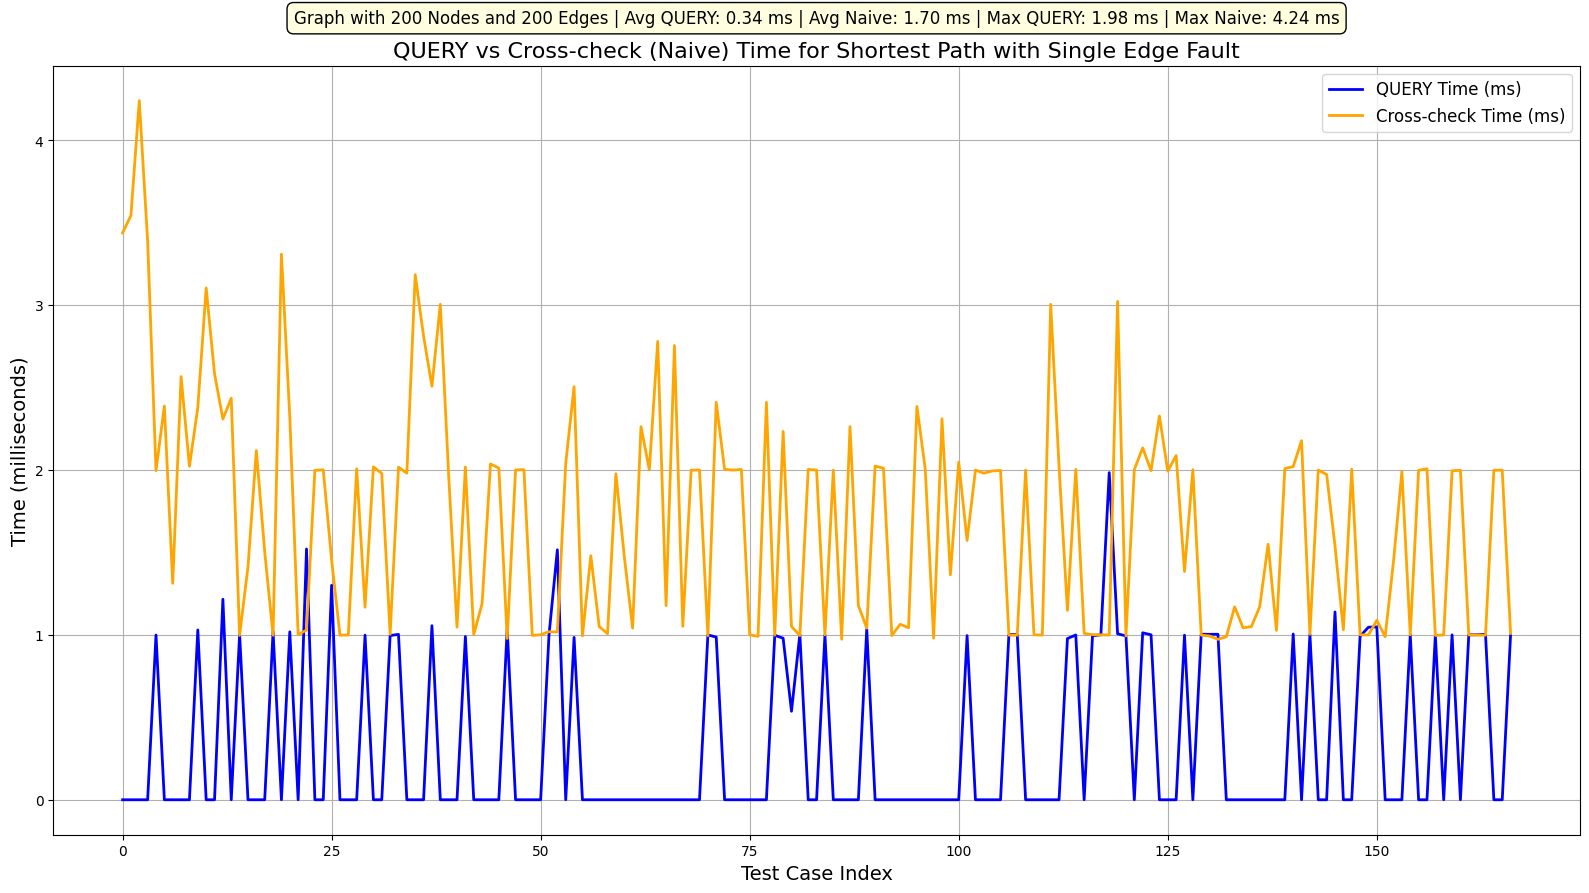

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# # Convert seconds to milliseconds
# query_time_ms = [t * 1_000 for t in query_time]
# naive_query_time_ms = [t * 1_000 for t in naive_query_time]

# # Compute statistics
# average_query_time = np.mean(query_time_ms)
# average_naive_time = np.mean(naive_query_time_ms)
# max_query_time = np.max(query_time_ms)
# max_naive_time = np.max(naive_query_time_ms)

# Create plot with access to axes
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(query_time_ms, label='QUERY Time (ms)', color='blue', linewidth=2)
ax.plot(naive_query_time_ms, label='Cross-check Time (ms)', color='orange', linewidth=2)
ax.set_xlabel("Test Case Index", fontsize=14)
ax.set_ylabel("Time (milliseconds)", fontsize=14)
ax.set_title("QUERY vs Cross-check (Naive) Time for Shortest Path with Single Edge Fault", fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)

# Add stats text box above the plot
stats_text = (
    f"Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges | "
    f"Avg QUERY: {average_query_time:.2f} ms | "
    f"Avg Naive: {average_naive_time:.2f} ms | "
    f"Max QUERY: {max_query_time:.2f} ms | "
    f"Max Naive: {max_naive_time:.2f} ms"
)
ax.text(0.5, 1.05, stats_text, transform=ax.transAxes,
        ha='center', va='bottom', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.4", edgecolor='black', facecolor='lightyellow'))

# Adjust layout to fit text
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()


### -----------------2-Fault Distance Oracle----------------


### Basic Function


In [19]:


def intact_from_failure_path(path, F):
    if path is None:
        return True
    if len(path)==1 or path == []:
        return True

    path_dist = D[path[0]][path[-1]]

    if len(F) == 0:
        return True


    for edge in F:
        u, v = edge[0], edge[1]
        wt = G[u][v]["weight"] 
        
        if u or v not in D[path[0]] or u not in D[path[-1]] or v not in D[path[-1]]:
            continue
        
        if (
            isclose(D[path[0]][u] + wt + D[path[-1]][v], path_dist) or
            isclose(D[path[0]][v] + wt + D[path[-1]][u], path_dist)
        ):
            return False

    return True





def intact_from_failure_tree(T, F):
    # Check if F is empty
    if T is None:
        # print("bfs_tree_of_S_rooted_x returned None")
        return True
    if not F:
        return True


    # Check if any vertex in F is in the tree T
    for edge in F:
        # Unpack edge into u and v
        u, v = edge[0], edge[1]

        if u in T or v in T:
            return False

    return True


### Sequential VS Parallel Processing

In [20]:
# import time
# from multiprocessing import Pool, cpu_count



# # Task function for parallel processing
# def process_combination(args):
#     G, x, y, d1, d2 = args
#     max_xy_edge, max_xy_path_new = maximizer1(G, x, y, d1, d2)
#     msg = (f"pair: ({x}, {y}), d1: {d1}, d2: {d2}, "
#            f"max_xy_edge: {max_xy_edge}, max_xy_path_new: {max_xy_path_new}")
#     return msg

# # Generate first 1000 valid combinations
# def get_combinations(G, nodes, d1_d2_list, max_items=1000):
#     combos = []
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         combos.append((G, x, y, d1, d2))
#                         if len(combos) >= max_items:
#                             return combos
#     return combos

# # Sequential execution
# def run_sequential(combos):
#     start = time.time()
#     for combo in combos:
#         msg = process_combination(combo)
#         # print(msg)
#     end = time.time()
#     return end - start

# # Parallel execution
# def run_parallel(combos, workers=cpu_count()):
#     start = time.time()
#     with Pool(processes=workers) as pool:
#         results = pool.map(process_combination, combos)
#     # for msg in results:
#     #     print(msg)
#     end = time.time()
#     return end - start

# # Entry point
# if __name__ == "__main__":
#     # Simulated graph and data
#     with open('graph.pkl', 'rb') as f:
#         G = pickle.load(f)  
#     # Generate combinations
#     nodes = list(G.nodes()) 
#     combos = get_combinations(G, nodes, d1_d2_list, max_items=1000)

#     print("\nRunning sequentially...")
#     seq_time = run_sequential(combos)
#     print(f"\nSequential time: {seq_time:.2f} seconds")

#     print("\nRunning with multiprocessing...")
#     par_time = run_parallel(combos, workers=64)
#     print(f"\nParallel time: {par_time:.2f} seconds")

#     if par_time > 0:
#         print(f"\nSpeedup: {seq_time / par_time:.2f}x")


### Maximizer Functions


In [21]:



def maximizer1(G, x, y, d1, d2):

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None

    possible_edges = combinations(G.edges, 2)
    
    for F_star in possible_edges:

        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]

        if (
            (D[x][eu1] >= d1 and D[x][eu] >= d1 and D[x][ev1] >= d1 and D[x][ev] >= d1)
            and ( D[y][ev1] >= d2 and  D[y][ev] >= d2 and D[y][eu1] >= d2 and D[y][eu] >= d2)
        ):  
            
            edge1_data = G.get_edge_data(eu , ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu1, ev1, **edge2_data)
                G.add_edge(eu , ev , **edge1_data)
                continue
                
            path2_distance , path2 = nx.single_source_dijkstra(G, x, y, weight='weight')

            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance
            G.add_edge(eu, ev, **edge1_data)
            G.add_edge(eu1, ev1, **edge2_data)


    if max_xy_path is None or len(max_xy_path) < 2:
        return max_xy_edge, []

    s = 0  # Start index of current subpath
    max_xy_path_new = []
    deviations_found = 0  # Counter for deviations

    i = 0
    while i < len(max_xy_path) - 1 and deviations_found < 2:
        u = max_xy_path[s]
        v = max_xy_path[i + 1]
        
        # Direct shortest path distance
        uv_distance = D[u][v]
        
        # Path distance along max_xy_path from u to v
        uv_path_distance = sum(
            G[max_xy_path[j]][max_xy_path[j + 1]]['weight']
            for j in range(s, i + 1)
        )
      
        
        # Check if path deviates from shortest path
        if uv_distance < uv_path_distance:
            deviations_found += 1
            # Define nodes for the deviation
            s_node = max_xy_path[s]  # Start of current subpath
            a = max_xy_path[i] if i > s else s_node  # Node before deviation
            b = v  # Deviation node
            
            if deviations_found == 1:
                # First deviation: store [s, a], (a, b)
                first_s_to_a = [s_node, a]  # Subpath from start to a
                first_a_to_b = (a, b)  # First deviating edge
                # Update start index to b for next subpath
                s = i + 1
            elif deviations_found == 2:
                # Second deviation: store [b_prev, c], (c, d), [d, t]
                # b_prev is the b from the first deviation
                c = a  # Node before second deviation
                d = b  # Second deviation node
                t = max_xy_path[-1]  # End node
                b_to_c = [first_a_to_b[1], c]  # Subpath from first b to c
                c_to_d = (c, d)  # Second deviating edge
                d_to_t = [d, t]  # Subpath from d to t
                # Construct the full output
                max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_c, c_to_d, d_to_t]
                break
        
        i += 1
    
    # If fewer than 2 deviations were found
    if deviations_found < 2:
        if deviations_found == 1:
            # Only one deviation: construct [s, a], (a, b), [b, t]
            t = max_xy_path[-1]
            b_to_t = [first_a_to_b[1], t]
            max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_t]
        else:
            # No deviations: return original path wrapped in a list
            max_xy_path_new = [max_xy_path[0], max_xy_path[-1]] 
    
    return max_xy_edge, max_xy_path_new

In [22]:
from itertools import combinations

def maximizer21(G, x, y, d1, V):
    G = G.copy()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None


    possible_edges = combinations(list(G.edges) , 2)
    for F_star in possible_edges:
        eu , ev = F_star[0];
        eu1 , ev1 = F_star[1]
        if (
            # nx.has_path(G, x, eu1)
            # and nx.has_path(G, y, ev1)
            # and 
            (
                D[x][eu1] >= d1  and D[x][eu] >= d1 and D[x][ev1] >= d1 and D[x][ev] >= d1
            )
            and intact_from_failure_path(shortest_paths[(V, y)], F_star)
            and intact_from_failure_tree(txu_dict[(y, V)], F_star)
        ):
            edge1_data = G.get_edge_data(eu, ev)    
            edge2_data = G.get_edge_data(eu1, ev1)
            
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1) 
            if not nx.has_path(G, x, y):
                G.add_edge(eu, ev, **edge1_data)
                G.add_edge(eu1, ev1, **edge2_data)
                continue

            path2_distance, path2 = nx.single_source_dijkstra(G, x, y, weight='weight') 
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance

            G.add_edge(eu1, ev1, **edge2_data)
            G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is None or len(max_xy_path) < 2:
        return max_xy_edge, []

    s = 0  # Start index of current subpath
    max_xy_path_new = []
    deviations_found = 0  # Counter for deviations

    i = 0
    while i < len(max_xy_path) - 1 and deviations_found < 2:
        u = max_xy_path[s]
        v = max_xy_path[i + 1]
        
        # Direct shortest path distance
        uv_distance = D[u][v]   
        
        # Path distance along max_xy_path from u to v
        uv_path_distance = sum(
            G[max_xy_path[j]][max_xy_path[j + 1]]['weight']
            for j in range(s, i + 1)
        )

        
        # Check if path deviates from shortest path
        if uv_distance < uv_path_distance:
            deviations_found += 1
            # Define nodes for the deviation
            s_node = max_xy_path[s]  # Start of current subpath
            a = max_xy_path[i] if i > s else s_node  # Node before deviation
            b = v  # Deviation node
            
            if deviations_found == 1:
                # First deviation: store [s, a], (a, b)
                first_s_to_a = [s_node, a]  # Subpath from start to a
                first_a_to_b = (a, b)  # First deviating edge
                # Update start index to b for next subpath
                s = i + 1
            elif deviations_found == 2:
                # Second deviation: store [b_prev, c], (c, d), [d, t]
                # b_prev is the b from the first deviation
                c = a  # Node before second deviation
                d = b  # Second deviation node
                t = max_xy_path[-1]  # End node
                b_to_c = [first_a_to_b[1], c]  # Subpath from first b to c
                c_to_d = (c, d)  # Second deviating edge
                d_to_t = [d, t]  # Subpath from d to t
                # Construct the full output
                max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_c, c_to_d, d_to_t]
                break
        
        i += 1
    
    # If fewer than 2 deviations were found
    if deviations_found < 2:
        if deviations_found == 1:
            # Only one deviation: construct [s, a], (a, b), [b, t]
            t = max_xy_path[-1]
            b_to_t = [first_a_to_b[1], t]
            max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_t]
        else:
            # No deviations: return original path wrapped in a list
            max_xy_path_new = [max_xy_path[0], max_xy_path[-1]] 
    
    return max_xy_edge, max_xy_path_new

In [23]:
def maximizer2(G, x, y, V, d2):
    G = G.copy()

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = []


    possible_edges = combinations(list(G.edges) , 2);
    for F_star in possible_edges:
        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]
 
        Vx_path = shortest_paths[(V, x)]
        txV = txu_dict[(x, V)]  
        if (
            # nx.has_path(G, x, eu1)
            # and nx.has_path(G, y, ev1)
            # and 
            (
                D[y][ev1] >= d2  and D[y][ev] >= d2 and D[y][ev1] >= d2 and D[y][ev] >= d2
            )
            and (intact_from_failure_path(Vx_path, F_star)
            and intact_from_failure_tree(txV, F_star))
        ):  
            edge1_data = G.get_edge_data(eu , ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu1, ev1, **edge2_data)
                G.add_edge(eu, ev, **edge1_data)
                continue

            path2_distance, path2 = nx.single_source_dijkstra(G, x, y, weight='weight')
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance

            G.add_edge(eu1, ev1, **edge2_data)

            G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is None or len(max_xy_path) < 2:
        return max_xy_edge, []

    s = 0  # Start index of current subpath
    max_xy_path_new = []
    deviations_found = 0  # Counter for deviations

    i = 0
    while i < len(max_xy_path) - 1 and deviations_found < 2:
        u = max_xy_path[s]
        v = max_xy_path[i + 1]
        
        # Direct shortest path distance
        uv_distance = D[u][v]
        
        # Path distance along max_xy_path from u to v
        uv_path_distance = sum(
            G[max_xy_path[j]][max_xy_path[j + 1]]['weight']
            for j in range(s, i + 1)
        )
 
        
        # Check if path deviates from shortest path
        if uv_distance < uv_path_distance:
            deviations_found += 1
            # Define nodes for the deviation
            s_node = max_xy_path[s]  # Start of current subpath
            a = max_xy_path[i] if i > s else s_node  # Node before deviation
            b = v  # Deviation node
            
            if deviations_found == 1:
                # First deviation: store [s, a], (a, b)
                first_s_to_a = [s_node, a]  # Subpath from start to a
                first_a_to_b = (a, b)  # First deviating edge
                # Update start index to b for next subpath
                s = i + 1
            elif deviations_found == 2:
                # Second deviation: store [b_prev, c], (c, d), [d, t]
                # b_prev is the b from the first deviation
                c = a  # Node before second deviation
                d = b  # Second deviation node
                t = max_xy_path[-1]  # End node
                b_to_c = [first_a_to_b[1], c]  # Subpath from first b to c
                c_to_d = (c, d)  # Second deviating edge
                d_to_t = [d, t]  # Subpath from d to t
                # Construct the full output
                max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_c, c_to_d, d_to_t]
                break
        
        i += 1
    
    # If fewer than 2 deviations were found
    if deviations_found < 2:
        if deviations_found == 1:
            # Only one deviation: construct [s, a], (a, b), [b, t]
            t = max_xy_path[-1]
            b_to_t = [first_a_to_b[1], t]
            max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_t]
        else:
            # No deviations: return original path wrapped in a list
            max_xy_path_new = [max_xy_path[0], max_xy_path[-1]] 
    
    return max_xy_edge, max_xy_path_new

In [24]:
def maximizer3(G, x, y, U, V):
    G = G.copy()    

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = []
    

    possible_edges = combinations(list(G.edges) , 2)

    for F_star in possible_edges:
        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]
        xu_path = shortest_paths[(x, U)]
        vy_path = shortest_paths[(V, y)]
        bfsTree_txu = txu_dict[(x, U)]
        bfsTree_tyv = txu_dict[(y, V)]

        
        if (
            # nx.has_path(G, x, eu1)
            # and nx.has_path(G, y, ev1)
            # and
            (intact_from_failure_path(xu_path, F_star)
            and intact_from_failure_tree(bfsTree_txu, F_star))
            and ((intact_from_failure_path(vy_path, F_star)
            and intact_from_failure_tree(bfsTree_tyv, F_star)))
        ):  
            
            edge1_data = G.get_edge_data(eu, ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu, ev, **edge1_data)
                G.add_edge(eu1, ev1, **edge2_data)
                continue
            


            path2_distance, path2 = nx.single_source_dijkstra(G, x, y, weight='weight') 
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance
            G.add_edge(eu1, ev1, **edge2_data)
            G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is None or len(max_xy_path) < 2:
        return max_xy_edge, []

    s = 0  # Start index of current subpath
    max_xy_path_new = []
    deviations_found = 0  # Counter for deviations

    i = 0
    while i < len(max_xy_path) - 1 and deviations_found < 2:
        u = max_xy_path[s]
        v = max_xy_path[i + 1]
        
        # Direct shortest path distance
        uv_distance = D[u][v]
        
        # Path distance along max_xy_path from u to v
        uv_path_distance = sum(
            G[max_xy_path[j]][max_xy_path[j + 1]]['weight']
            for j in range(s, i + 1)
        )

        
        # Check if path deviates from shortest path
        if uv_distance < uv_path_distance:
            deviations_found += 1
            # Define nodes for the deviation
            s_node = max_xy_path[s]  # Start of current subpath
            a = max_xy_path[i] if i > s else s_node  # Node before deviation
            b = v  # Deviation node
            
            if deviations_found == 1:
                # First deviation: store [s, a], (a, b)
                first_s_to_a = [s_node, a]  # Subpath from start to a
                first_a_to_b = (a, b)  # First deviating edge
                # Update start index to b for next subpath
                s = i + 1
            elif deviations_found == 2:
                # Second deviation: store [b_prev, c], (c, d), [d, t]
                # b_prev is the b from the first deviation
                c = a  # Node before second deviation
                d = b  # Second deviation node
                t = max_xy_path[-1]  # End node
                b_to_c = [first_a_to_b[1], c]  # Subpath from first b to c
                c_to_d = (c, d)  # Second deviating edge
                d_to_t = [d, t]  # Subpath from d to t
                # Construct the full output
                max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_c, c_to_d, d_to_t]
                break
        
        i += 1
    
    # If fewer than 2 deviations were found
    if deviations_found < 2:
        if deviations_found == 1:
            # Only one deviation: construct [s, a], (a, b), [b, t]
            t = max_xy_path[-1]
            b_to_t = [first_a_to_b[1], t]
            max_xy_path_new = [first_s_to_a, first_a_to_b, b_to_t]
        else:
            # No deviations: return original path wrapped in a list
            max_xy_path_new = [max_xy_path[0], max_xy_path[-1]] 
    
    return max_xy_edge, max_xy_path_new



### Load Maximizers from Local files


In [25]:
# load all maximizer_dict
with open('maximizer_dict1.pkl', 'rb') as f:
    maximizer_dict1 = pickle.load(f)
with open('maximizer_dict21.pkl', 'rb') as f:
    maximizer_dict21 = pickle.load(f)
with open('maximizer_dict2.pkl', 'rb') as f:
    maximizer_dict2 = pickle.load(f)
with open('maximizer_dict3.pkl', 'rb') as f:
    maximizer_dict3 = pickle.load(f)

=====================================Findpath Function=============================


In [26]:
def FINDPATHS(G, s, t, F2):
    """
    Optimized version of FINDPATHS to find paths while avoiding specific edges.
    """
    F_prime = []
    P = []
    f = len(F2)

    for i in range(1, f + 1):
        # Determine the path P_i based on F_prime
        if F_prime:
            u, v = F_prime[i - 2][0] , F_prime[i - 2][1]
            P_i, Pi_wt = QUERY(G, s, t, [(u, v)])
        else:
            P_i, Pi_wt = shortest_paths[(s, t)] , D[s][t] if (s, t) in shortest_paths else ([], float('inf'))

        P.append(P_i)

        # Skip if no valid path is found
        if not P_i:
            continue

        # Calculate the weight of the current path
        weight_p_i = Pi_wt  

        # Update F2 by removing the last edge in F_prime
        if F_prime:

            F2 =  list(set(F2) - set(F_prime))

        # Iterate through edges in F2 to find matching edges
        for e1 in F2:
            # Ensure e1.u is the smaller vertex

            if e1[0] not in D[s]:
                D[s][e1[0]] = float('inf')
            if e1[1] not in D[s]:
                D[s][e1[1]] = float('inf')
            
            if D[s][e1[0]] > D[s][e1[1]]:
                u, v = (e1[1], e1[0])
            else:
                u, v = (e1[0], e1[1])

            # Query subpaths R1 and R2
            if F_prime:
                R1, weight_R1 = QUERY(G, s, u, [(u, v)])
                R2, weight_R2 = QUERY(G, v, t,  [(u, v)])

            else:
                # If F_prime is empty, use the shortest paths directly
                if (s, u) not in shortest_paths or (v, t) not in shortest_paths:
                    continue
                R1, weight_R1 = shortest_paths[(s, u)], D[s][u]
                R2, weight_R2 = shortest_paths[(v, t)], D[v][t]


            # Calculate weights of R1, R2, and the edge e1
         
            weight_e = G[u][v]['weight']

            # Check if the combined weight matches the path weight
            if isclose(weight_p_i, weight_R1 + weight_R2 + weight_e):
                F_prime.append(e1)
                break
        else:
            # If no matching edge is found, return the paths found so far
            return P

    return P

===================================Find Intermediate Functions =================================


In [27]:
def FIND_INTERMEDIATE3(G, x, y, u, v, F):
    """
    Optimized version of FIND_INTERMEDIATE3 to find the path and intermediate vertices.
    """
    # Retrieve F_star and xy_F_star from the dictionary
    F_star, xy_F_star = maximizer_dict3.get((x, y, u, v), (None, None))
    
    # If no valid F_star, return the shortest path and an empty list
    if not F_star or not xy_F_star or xy_F_star==[]:    
        return ([], 0), []
    # Check if F_star is empty
    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    INTERMEDIATE = []
    path_distance = float("inf")

    # Check for a direct path
    if any((edge[0] == x and edge[1] == y) or (edge[0] == y and edge[1] == x) for edge in F_star):
        direct_path = [x, y]
        direct_path_distance = G[x][y]["weight"]

        
        
    if len(xy_F_star) == 5:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] #segment1
        ab = xy_F_star[1]   #intermediate edge1
        bc = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] #segment2
        cd = xy_F_star[3]  #intermediate edge2
        dy = shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])] if xy_F_star[4][0]!=xy_F_star[4][1] else [] #segment3
        if not single_edge_in_path(xa, F) and not single_edge_in_path(bc, F) and not single_edge_in_path(dy, F) and not edge_in_fault_edge(F, ab) and  not edge_in_fault_edge(F, cd):
            PATH = xa + [ab[1]] + bc[1:] + [cd[1]] + (dy[1:] if len(dy) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + D[bc[0]][bc[-1]] + G[cd[0]][cd[1]]["weight"] + (D[dy[0]][dy[-1]] if len(dy) > 1 else 0)
    

    elif len(xy_F_star) == 3:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] 
        ab = xy_F_star[1]
        by = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] if xy_F_star[2][0]!=xy_F_star[2][1] else []
        if not single_edge_in_path(xa, F) and not single_edge_in_path(by, F) and not edge_in_fault_edge(F, ab):
            PATH = xa + [ab[1]] + (by[1:] if len(by) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + (D[by[0]][by[-1]] if len(by) > 1 else 0)
        

    else:
        xy = shortest_paths[(xy_F_star[0] , xy_F_star[1])]
        if not single_edge_in_path(xy, F):
            PATH = xy
            path_distance = D[xy[0]][xy[-1]]


    if direct_path and direct_path_distance < path_distance and not edge_in_fault_edge(F, (direct_path[0], direct_path[1])):
        PATH = direct_path
        path_distance = direct_path_distance
 
        
   
    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for z in F_star_vertices:
        # Check if z satisfies the conditions of an intermediate vertex
        xz = shortest_paths[(x, z)]
        zy = shortest_paths[(z, y)]
        if single_edge_in_path(xz, F) and single_edge_in_path(zy, F):
            INTERMEDIATE.append(z)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return (PATH, path_distance), INTERMEDIATE

In [28]:
def FIND_INTERMEDIATE2(G, x, y, u, F):
    """
    Optimized version of FIND_INTERMEDIATE2 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge[0] for edge in F}.union({edge[1] for edge in F})

    # Calculate d2
    d2 = min(floor_power_of_2(D[y][b] if b in D[y] else float('inf')) for b in vertices)

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []

    # Retrieve F_star and xy_F_star
    F_star, xy_F_star = maximizer_dict2.get((x, y, u, d2), (None, None))
    if not F_star or not xy_F_star or xy_F_star == []:
        return shortest_paths[(x, y)], []

    # Check for direct path
    for edge in F_star:
        if (edge[0] == x and edge[1] == y) or (edge[0] == y and edge[1] == x):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]


    if len(xy_F_star) == 5:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] #segment1
        ab = xy_F_star[1]   #intermediate edge1
        bc = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] #segment2
        cd = xy_F_star[3]  #intermediate edge2
        dy = shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])] if xy_F_star[4][0]!=xy_F_star[4][1] else [] #segment3
        if not single_edge_in_path(xa, F) and not single_edge_in_path(bc, F) and not single_edge_in_path(dy, F) and not edge_in_fault_edge(F, ab) and  not edge_in_fault_edge(F, cd):
            PATH = xa + [ab[1]] + bc[1:] + [cd[1]] + (dy[1:] if len(dy) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + D[bc[0]][bc[-1]] + G[cd[0]][cd[1]]["weight"] + (D[dy[0]][dy[-1]] if len(dy) > 1 else 0)

    elif len(xy_F_star) == 3:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] 
        ab = xy_F_star[1]
        by = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] if xy_F_star[2][0]!=xy_F_star[2][1] else []
        if not single_edge_in_path(xa, F) and not single_edge_in_path(by, F) and not edge_in_fault_edge(F, ab):
            PATH = xa + [ab[1]] + (by[1:] if len(by) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + (D[by[0]][by[-1]] if len(by) > 1 else 0)


    else:

        xy = shortest_paths[(xy_F_star[0] , xy_F_star[1])]
        if not single_edge_in_path(xy, F):
            PATH = xy
            path_distance = D[xy[0]][xy[-1]]

  


    if direct_path and direct_path_distance < path_distance and not edge_in_fault_edge(F, (direct_path[0], direct_path[1])):
        PATH = direct_path
        path_distance = direct_path_distance
  
        
                


    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for v in F_star_vertices:
        # Check y-clean vertex
        yv = shortest_paths[(y, v)] if (y, v) in shortest_paths else []
        xv = shortest_paths[(x, v)] if (x, v) in shortest_paths else []
        
        bfs_tree_of_y_rooted_v = txu_dict[(y, v)]

        if intact_from_failure_path(yv, F) and intact_from_failure_tree(bfs_tree_of_y_rooted_v, F):
            P, I = FIND_INTERMEDIATE3(G, x, y, u, v, F)
            if P[0]!=[]:
                p_distance = P[1]
                if p_distance < path_distance:
                    PATH = P[0]
                    path_distance = p_distance
 
                INTERMEDIATE.extend(I)

        # Check intermediate vertex
        elif single_edge_in_path(xv, F) and single_edge_in_path(yv, F):
            INTERMEDIATE.append(v)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return (PATH, path_distance), INTERMEDIATE

In [29]:
def FIND_INTERMEDIATE21(G, x, y, v, F):
    """
    Optimized version of FIND_INTERMEDIATE21 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge[0] for edge in F}.union({edge[1] for edge in F})

    # Calculate d1
    d1 = min(floor_power_of_2(D[x][a] if a in D[x] else float('inf')) for a in vertices)

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []

    # Retrieve F_star and xy_F_star
    F_star, xy_F_star = maximizer_dict21.get((x, y, d1, v), (None, None))
    if not F_star:
        return (shortest_paths[(x, y)], D[x][y]), []

    # Check for direct path
    for edge in F_star:
        if (x == edge[0] and y == edge[1]) or (x == edge[1] and y == edge[0]):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]

    # Construct xy_F_star_path
    if len(xy_F_star) == 5:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] #segment1
        ab = xy_F_star[1]   #intermediate edge1
        bc = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] #segment2
        cd = xy_F_star[3]  #intermediate edge2
        dy = shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])] if xy_F_star[4][0]!=xy_F_star[4][1] else [] #segment3
        if not single_edge_in_path(xa, F) and not single_edge_in_path(bc, F) and not single_edge_in_path(dy, F) and not edge_in_fault_edge(F, ab) and  not edge_in_fault_edge(F, cd):
            PATH = xa + [ab[1]] + bc[1:] + [cd[1]] + (dy[1:] if len(dy) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + D[bc[0]][bc[-1]] + G[cd[0]][cd[1]]["weight"] + (D[dy[0]][dy[-1]] if len(dy) > 1 else 0)

    elif len(xy_F_star) == 3:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] 
        ab = xy_F_star[1]
        by = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] if xy_F_star[2][0]!=xy_F_star[2][1] else []
        if not single_edge_in_path(xa, F) and not single_edge_in_path(by, F) and not edge_in_fault_edge(F, ab):
            PATH = xa + [ab[1]] + (by[1:] if len(by) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + (D[by[0]][by[-1]] if len(by) > 1 else 0)

    else:
        xy = shortest_paths[(xy_F_star[0] , xy_F_star[1])]
        if not single_edge_in_path(xy, F):
            PATH = xy
            path_distance = D[xy[0]][xy[-1]]
  


    if direct_path and direct_path_distance < path_distance and not edge_in_fault_edge(F, (direct_path[0], direct_path[1])):
        path_distance = direct_path_distance
 
        

    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for u in F_star_vertices:
        # Check x-clean vertex
        xu = shortest_paths[(x, u)] if (x, u) in shortest_paths else []
        yu = shortest_paths[(y, u)] if (y, u) in shortest_paths else []
        bfs_tree_of_x_rooted_u = txu_dict[(x, u)]

        if intact_from_failure_path(xu, F) and intact_from_failure_tree(bfs_tree_of_x_rooted_u, F):
            P, I = FIND_INTERMEDIATE3(G, x, y, u, v, F)
            if P[0] != []:
                p_distance = P[1]
                # Check if the path distance is less than the current path distance
                if p_distance < path_distance:
                    PATH = P[0]
                    path_distance = p_distance
            INTERMEDIATE.extend(I)

        # Check intermediate vertex
        elif single_edge_in_path(xu, F) and single_edge_in_path(yu, F):
            INTERMEDIATE.append(u)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return (PATH, path_distance), INTERMEDIATE

In [30]:
def FIND_INTERMEDIATE1(G, x, y, r, F):
    """
    Optimized version of FIND_INTERMEDIATE1 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge[1] for edge in F}.union({edge[0] for edge in F})

    # Calculate d1 and d2
    d1 = min(floor_power_of_2(D[x][a]) if a in D[x] else float("inf") for a in vertices)
    d2 = min(floor_power_of_2(D[y][a]) if a in D[y] else float("inf") for a in vertices)
    # Initialize variablese variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []
    F_star, xy_F_star = maximizer_dict1.get((x, y, d1, d2), (None, None))
    

    if not F_star:
        return (shortest_paths[(x, y)] , float("inf")), []

    # Check for direct path
    for edge in F_star:
        if (x == edge[0] and y == edge[1]) or (x == edge[1] and y == edge[0]):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]


    # Construct xy_F_star_path
    if len(xy_F_star) == 5:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] #segment1
        ab = xy_F_star[1]   #intermediate edge1
        bc = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] #segment2
        cd = xy_F_star[3]  #intermediate edge2
        dy = shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])] if xy_F_star[4][0]!=xy_F_star[4][1] else [xy_F_star[4][0]] #segment3
        if not single_edge_in_path(xa, F) and not single_edge_in_path(bc, F) and not single_edge_in_path(dy, F) and not edge_in_fault_edge(F, ab) and  not edge_in_fault_edge(F, cd):
            PATH = xa + [ab[1]] + bc[1:] + [cd[1]] + (dy[1:] if len(dy) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + D[bc[0]][bc[-1]] + G[cd[0]][cd[1]]["weight"] + (D[dy[0]][dy[-1]] if len(dy) > 1 else 0)

    elif len(xy_F_star) == 3:
        xa = shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] 
        ab = xy_F_star[1]
        by = shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] if xy_F_star[2][0]!=xy_F_star[2][1] else [xy_F_star[2][0]]
        by = by if by[0] != by[-1] else []
        if not single_edge_in_path(xa, F) and not single_edge_in_path(by, F) and not edge_in_fault_edge(F, ab):
            PATH = xa + [ab[1]] + (by[1:] if len(by) > 1 else [])
            path_distance = D[xa[0]][xa[-1]] + G[ab[0]][ab[1]]["weight"] + (D[by[0]][by[-1]] if len(by) > 1 else 0)

    else:
        xy = shortest_paths[(xy_F_star[0] , xy_F_star[1])]
        if not single_edge_in_path(xy, F):
            PATH = xy
            path_distance = D[xy[0]][xy[-1]]

  


    if (direct_path and direct_path_distance < path_distance) and not edge_in_fault_edge(F, (direct_path[0], direct_path[1])):
        PATH = direct_path
        path_distance = direct_path_distance
   
    # Process vertices in F_star
    F_star_vertices = list({vertex for edge in F_star for vertex in edge})
    for u in F_star_vertices:
        # Check x-clean vertex
        xu = shortest_paths[(x, u)]
        bfs_tree_of_s_rooted_x = txu_dict[(x, u)]
        yu = shortest_paths[(y, u)]
        bfs_tree_of_s_rooted_y = txu_dict[(y, u)]
        if intact_from_failure_path(xu, F) and intact_from_failure_tree(bfs_tree_of_s_rooted_x, F):
            P1, I1 = FIND_INTERMEDIATE2(G, x, y, u, F)
            if P1[0] != []:
                # Extract the path and its distance
                p1_distance = P1[1]
                # Check if the path distance is less than the current path distance
                if p1_distance < path_distance:
                    PATH = P1[0]
                    path_distance = p1_distance
            INTERMEDIATE.extend(I1)

        # Check y-clean vertex
        elif intact_from_failure_path(yu, F) and intact_from_failure_tree(bfs_tree_of_s_rooted_y, F):
            P2, I2 = FIND_INTERMEDIATE21(G, x, y, u, F)
            if P2[0] != []:
                p2_distance = P2[1] 
                if p2_distance < path_distance:
                    PATH = P2[0]
                    path_distance = p2_distance
            INTERMEDIATE.extend(I2)

        # Check intermediate vertex
        # elif single_edge_in_path(xu, F) and single_edge_in_path(yu, F):
        elif single_edge_in_path(xu, F) and not intact_from_failure_tree(bfs_tree_of_s_rooted_x, F):
            INTERMEDIATE.append(u)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return (PATH, path_distance), INTERMEDIATE

===================================== Main Function ===================================


In [31]:


def QUERY2(G ,s, t, r, F):

    if r == 0:
        return [] , float("inf")
    P = FINDPATHS(G ,s, t, F[:])
 
    f = len(F)
    
    if len(P)< f:
        return P[0] , D[P[0][0]][P[0][-1]]  if P else float("inf")
    jumps = []
    for i in range(f):
        jump_st = FINDJUMP(P[i], F[:])

        jump_ts = FINDJUMP(P[i][::-1], F[:])

        jumps.append((jump_st, jump_ts))

    PATH = []
    
    path_distance = float("inf")
    processed_pairs = set()
    INTERMEDIATE = []  
    
    for i in range(f):
        for j in range(f):
            for x, y in product(jumps[i][0], jumps[j][1]):
                if(x!=y) and (x, y) not in processed_pairs:
                    # print(f"jumps[i][0]={jumps[i][0]}, jumps[j][1]={jumps[j][1]}")
                    processed_pairs.add((x, y))
                    sx = shortest_paths[(s, x)]     
                    sy = shortest_paths[(s, y)]
                    xt = shortest_paths[(x, t)]
                    yt = shortest_paths[(y, t)]  


                    if single_edge_in_path(sx, F[:]) and single_edge_in_path(xt, F[:]):
                        INTERMEDIATE.append(x)
                    # y satisfies the conditionof an intermediate vertex
                    elif single_edge_in_path(sy, F[:]) and single_edge_in_path(yt, F[:]):
                        INTERMEDIATE.append(y)
                    else:
                        p, I = FIND_INTERMEDIATE1(G, x, y, r, F[:])
                        if single_edge_in_path(sx, F[:]) or single_edge_in_path(yt, F[:]):
                            if I is not None and I != []:
                                INTERMEDIATE.extend(I)
                            continue
                        if p[0] is None or p[0] == []:
                            continue
                        P_prime = []
    

                        P_prime = sx + p[0][1:-1] + yt

                        
                        # we can do it by distance oracle but need to check distance oracle to fix
                        P_prime_distance = D[s][x] + p[1] + D[y][t]

                        if P_prime_distance < path_distance:
                            PATH = P_prime
                            path_distance = P_prime_distance
                            
                            

                        if I is not None and I != []:
                            INTERMEDIATE.extend(I)



    INTERMEDIATE = list(set(INTERMEDIATE))
    # print(f"INTERMEDIATE={INTERMEDIATE}")

    for u in INTERMEDIATE:
        query_path = []
        query_path_distance = float("inf")


        path1 , path1_distance = QUERY2(G, s, u, r - 1, F[:])
        path2 , path2_distance = QUERY2(G, u, t, r - 1, F[:])

        if path1 == [] and path2 == []: 
            query_path = []
        else:
            query_path = path1 + path2[1:] if path2 else path1
            query_path_distance = path1_distance + path2_distance

            
        if query_path != [] and query_path_distance < path_distance:    
                # print(f"Found better path: {query_path} with distance {query_path_distance}")
                PATH = query_path
                path_distance = query_path_distance

    return PATH, path_distance

DIRECT PATH CASE

#Cross Check Function

In [32]:
import heapq

def Dijkstra(G, source, destination):
    """
    Dijkstra's algorithm to find the shortest path from source to destination.
    Returns (total_weight, path).
    """
    dist = {node: float('inf') for node in G.nodes()}
    prev = {node: None for node in G.nodes()}
    dist[source] = 0
    priority_queue = [(0, source)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == destination:
            break

        if current_distance > dist[current_node]:
            continue

        for neighbor, edge_data in G[current_node].items():
            weight = edge_data['weight']
            distance = current_distance + weight

            if distance < dist[neighbor]:
                dist[neighbor] = distance
                prev[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    # Reconstruct path
    path = []
    node = destination
    if dist[node] == float('inf'):
        return float('inf'), []
    while node is not None:
        path.append(node)
        node = prev[node]
    path.reverse()

    return dist[destination], path

In [33]:

import networkx as nx

def cross_check2(G, s, t, e1, e2):
    G = G.copy()
    e1_u, e1_v = e1
    e2_u, e2_v = e2
    
    if not G.has_node(s) or not G.has_node(t):
        print("Source or target node does not exist in the graph.")  
        return [] , float("inf")    
    
    edge1_exists = False
    edge2_exists = False

    # Check if edges exist before removing them
    if G.has_edge(e1_u, e1_v):
        edge1_exists = True
        edge1_data = G.get_edge_data(e1_u, e1_v)

        G.remove_edge(e1_u, e1_v)
    else:
        print(f"Edge ({e1_u}, {e1_v}) does not exist in the graph.")
    
    if G.has_edge(e2_u, e2_v):
        edge2_exists = True
        edge2_data = G.get_edge_data(e2_u, e2_v)
       # Added debug print
        G.remove_edge(e2_u, e2_v)
    else:
        print(f"Edge ({e2_u}, {e2_v}) does not exist in the graph.")

    # Find the shortest path
    try:
        # wt_st , st_path = nx.single_source_dijkstra(G, s, t, weight="weight")
        wt_st , st_path = Dijkstra(G, s, t)
          
      # Added debug print
    except nx.NetworkXNoPath:
        st_path = []
        print(f"No path exists between nodes {s} and {t} after removing edges ({e1_u}, {e1_v}) and ({e2_u}, {e2_v}).")
        return st_path , float("inf")
    except nx.NodeNotFound as e:    
        print(f"Node not found: {e}")
        return [], float("inf") 
    # Add the edges back to the graph
    if edge1_exists:
        G.add_edge(e1_u, e1_v, **edge1_data)
     
    if edge2_exists:
        G.add_edge(e2_u, e2_v, **edge2_data)
        

    return st_path, wt_st

In [34]:

import random
import time

f = 2

query_times = []
cross_check_times = []

right = 0
wrong = 0

for case in range(1, 100):
    x = random.randint(0, 50)
    y = random.randint(0, 50)
    print(f"case:{case} ===>")
    if x == y:
        continue
    try:
        print(shortest_paths[(x, y)])
    except KeyError:
        print(f"Shortest path for ({x}, {y}) not found in shortest_paths.")
        continue

    path = shortest_paths[(x, y)]

    pedges = []
    for i in range(len(path) - 1):
        pedges.append((path[i], path[i + 1])) 
    if len(pedges) < 2:
        continue
    e1 = random.choice(pedges)
    edges_list = list(G.edges())
    # Filter out edges that are not allowed for e2
    filtered_edges = [
        edge for edge in edges_list
        if not (
            (e1[0] == edge[0] or e1[1] == edge[1] or edge[0] == x or edge[1] == y) or
            (e1[0] == edge[1] or e1[1] == edge[0])  # Also avoid reverse direction
        )
    ]
    if not filtered_edges:  
        continue
    e2 = random.choice(filtered_edges)

    F3 = [(e1[0], e1[1]), (e2[0], e2[1])]   
    

    print(f"avoiding edges:{e1[0], e1[1]}, {e2[0], e2[1]}")
    start_time = time.time()
    query_output , q_weight  = QUERY2(G, x, y, 3, F3)
    query_times.append(time.time() - start_time)
    print("Query time--- %s seconds ---" % (time.time() - start_time))

    print(f"query output:{query_output} , weight:{q_weight}")

    start_time = time.time()
    cross_check_output , c_weight = cross_check2(G, x, y, (e1[0], e1[1]), (e2[0], e2[1]))
    cross_check_times.append(time.time() - start_time)

    print(f"cross_check output:{cross_check_output} , weight:{c_weight}")
    print("Cross_check time--- %s seconds ---" % (time.time() - start_time))
    if query_output != cross_check_output:
        wrong += 1
        print("!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!")
    else:
        right += 1

    print("===================================================")



case:1 ===>
Shortest path for (24, 48) not found in shortest_paths.
case:2 ===>
[41, 183, 184, 4, 5, 190, 132, 199, 15, 176, 80, 30]
avoiding edges:(183, 184), (69, 171)
Query time--- 8.37489652633667 seconds ---
query output:[41, 183, 182, 46, 170, 96, 95, 94, 3, 1, 0, 199, 15, 176, 80, 30] , weight:613.075376884422
cross_check output:[41, 183, 182, 46, 170, 96, 95, 94, 3, 1, 0, 199, 15, 176, 80, 30] , weight:613.0753768844222
Cross_check time--- 0.003461122512817383 seconds ---
case:3 ===>
Shortest path for (33, 28) not found in shortest_paths.
case:4 ===>
Shortest path for (26, 11) not found in shortest_paths.
case:5 ===>
Shortest path for (35, 21) not found in shortest_paths.
case:6 ===>
[11, 139, 147, 132, 131, 10]
avoiding edges:(11, 139), (35, 134)
Query time--- 0.01611948013305664 seconds ---
query output:[] , weight:inf
cross_check output:[] , weight:inf
Cross_check time--- 0.002000093460083008 seconds ---
case:7 ===>
[9, 10, 131, 132, 190, 5, 4, 184, 183, 182, 46, 170, 96, 32

In [35]:
print(f"right={right}, wrong={wrong}")


right=52, wrong=0


*Debugging

In [36]:
# case:54 ===>
# [43, 106, 82, 152, 111, 112, 113, 114, 44, 45, 46, 182, 183, 184, 4, 5, 190, 132, 131, 10]
# avoiding edges:(190, 132), (188, 187)
# Query time--- 17.67037296295166 seconds ---
# query output:[43, 106, 82, 152, 111, 112, 113, 114, 44, 45, 46, 170, 96, 95, 94, 3, 1, 0, 199, 132, 131, 10] , weight:906.5276381909547
# cross_check output:[43, 106, 82, 152, 111, 112, 113, 114, 44, 45, 46, 170, 96, 95, 94, 3, 1, 0, 199, 132, 131, 10] , weight:906.5276381909548
# Cross_check time--- 0.0019989013671875 seconds ---

e = [(190, 132), (188, 187)]
# QUERY2(G, 43, 10, 3, e)
cross_check2(G, 43, 10, (190, 132), (188, 187))


([43,
  106,
  82,
  152,
  111,
  112,
  113,
  114,
  44,
  45,
  46,
  170,
  96,
  95,
  94,
  3,
  1,
  0,
  199,
  132,
  131,
  10],
 906.5276381909548)

In [37]:
# case:25 ===>
# [3, 94, 95, 96, 32]
# avoiding edges:(95, 96), (4, 184)
# Query time--- 31.756251573562622 seconds ---
# query output:[] , weight:inf
# cross_check output:[] , weight:inf
# Cross_check time--- 0.0019981861114501953 seconds ---
import cProfile
e = [(95, 96) , (4, 184)]


# cProfile.run('QUERY2(G, 3, 32, 3, e)')
QUERY2(G, 3, 32, 3, e)


([], inf)

In [38]:

import random
import time

f = 2

query_times = []
cross_check_times = []

right = 0
wrong = 0

for case in range(1, 200):
    x = random.randint(0, 50)
    y = random.randint(0, 50)
    print(f"case:{case} ===>")
    if x == y:
        continue
    try:
        print(shortest_paths[(x, y)])
    except KeyError:
        print(f"Shortest path for ({x}, {y}) not found in shortest_paths.")
        continue

    path = shortest_paths[(x, y)]

    pedges = []
    for i in range(len(path) - 1):
        pedges.append((path[i], path[i + 1]))
    if len(pedges) < 1:
        continue
    e1 = random.choice(pedges)
    path2 , path2_distance = QUERY(G, x, y, [(e1[0], e1[1])]) 

    if path2 == []:
        continue
    pedges2 = []
    for i in range(len(path2) - 1):
        pedges2.append((path2[i], path2[i + 1]))
    if len(pedges2) < 1:
        continue
    
    e2 = random.choice(pedges2)
    # print(f"e1={e1}, e2={e2}")
    F3 = [(e1[0], e1[1]), (e2[0], e2[1])]
    # print(G.has_edge(e1[0], e1[1]) , G.has_edge(e2[0], e2[1]))   
    print(f"avoiding edges:{e1[0], e1[1]}, {e2[0], e2[1]}")
    start_time = time.time()
    query_output, q_weight = QUERY2(G, x, y, 3, F3)
    query_times.append(time.time() - start_time)
    print("Query time--- %s seconds ---" % (time.time() - start_time))

    print(f"query output:{query_output} , weight:{q_weight}")

    start_time = time.time()
    cross_check_output, c_weight = cross_check2(G, x, y, (e1[0], e1[1]), (e2[0], e2[1]))
    cross_check_times.append(time.time() - start_time)

  

    print(f"cross_check output:{cross_check_output} , weight:{c_weight}")
    print("Cross_check time--- %s seconds ---" % (time.time() - start_time))
    if query_output != cross_check_output:
        wrong += 1
        print("!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!")
    else:
        right += 1

    print("===================================================")


case:1 ===>
Shortest path for (50, 11) not found in shortest_paths.
case:2 ===>
[0, 199, 132, 190, 5, 4, 184, 183, 182, 46, 45, 44, 114, 113, 112, 111, 152, 40]
case:3 ===>
Shortest path for (25, 49) not found in shortest_paths.
case:4 ===>
[5, 4, 184, 183, 182, 46, 45, 44, 150, 55, 54, 143, 23]
avoiding edges:(182, 46), (96, 170)
Query time--- 17.409607648849487 seconds ---
query output:[] , weight:inf
cross_check output:[] , weight:inf
Cross_check time--- 0.002000093460083008 seconds ---
case:5 ===>
[26, 195, 34, 35, 134, 133, 28, 118, 189, 38, 37, 130, 129, 17]
case:6 ===>
[43, 106, 82, 152, 111, 112, 113, 114, 44, 150, 55, 54, 143, 23, 22]
case:7 ===>
Shortest path for (34, 27) not found in shortest_paths.
case:8 ===>
[26, 195, 34, 35, 134, 133, 28, 118, 189, 38, 37, 130, 129, 17]
case:9 ===>
Shortest path for (36, 25) not found in shortest_paths.
case:10 ===>
Shortest path for (2, 37) not found in shortest_paths.
case:11 ===>
Shortest path for (24, 40) not found in shortest_paths.

right=41, wrong=0


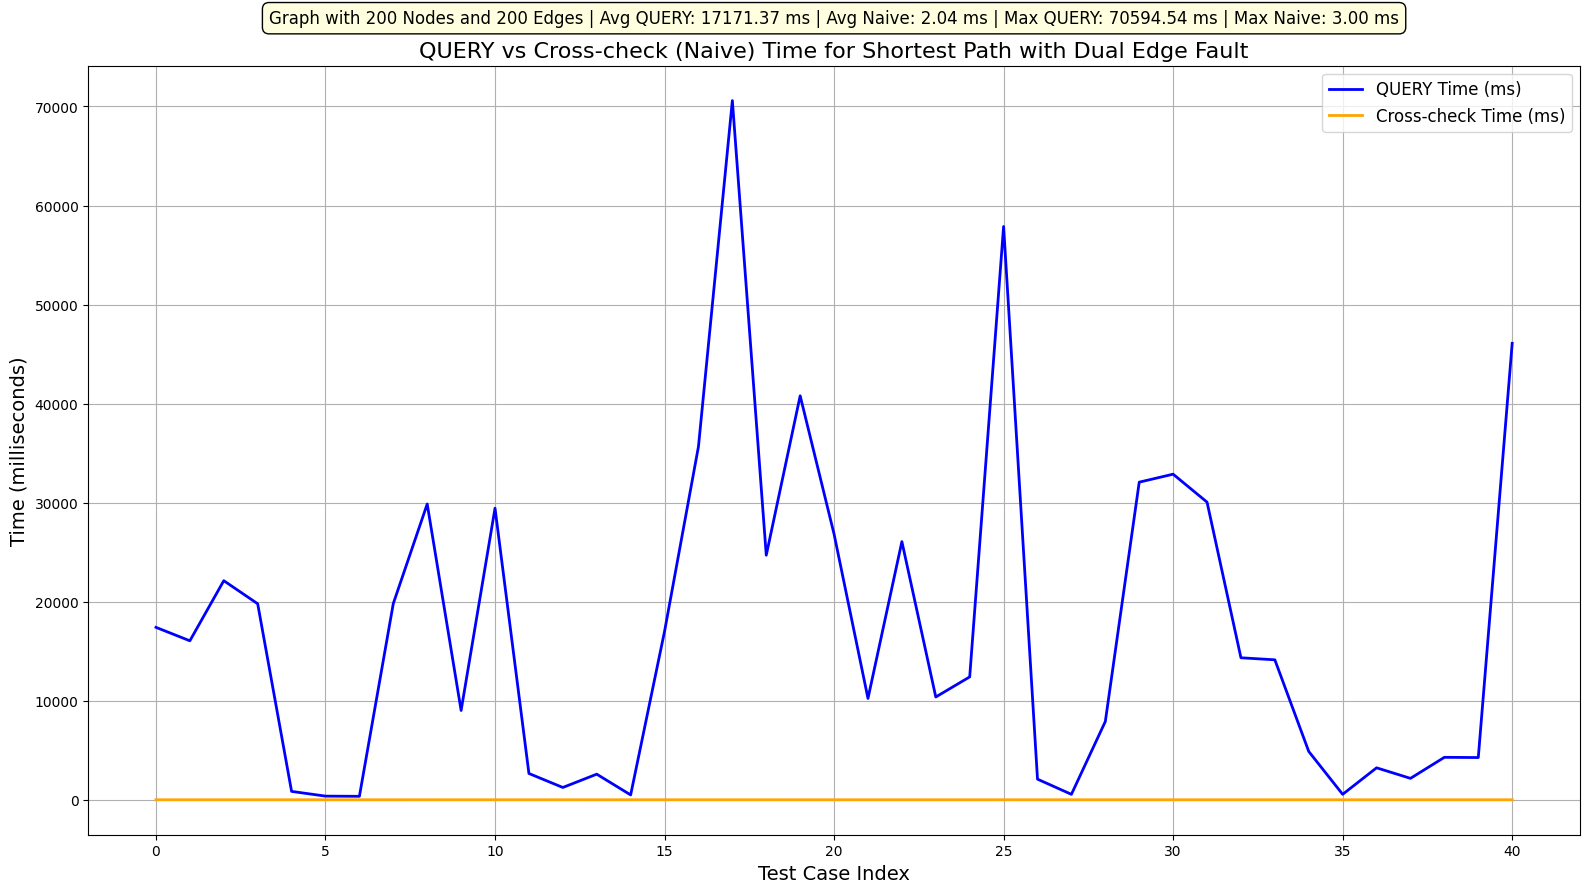

In [39]:
import matplotlib.pyplot as plt
import numpy as np

print(f"right={right}, wrong={wrong}")

# Convert seconds to milliseconds
query_time_ms = [t * 1_000 for t in query_times]
naive_query_time_ms = [t * 1_000 for t in cross_check_times]    

# Compute statistics
average_query_time = np.mean(query_time_ms)
average_naive_time = np.mean(naive_query_time_ms)
max_query_time = np.max(query_time_ms)
max_naive_time = np.max(naive_query_time_ms)

# Create plot with access to axes
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(query_time_ms, label='QUERY Time (ms)', color='blue', linewidth=2)
ax.plot(naive_query_time_ms, label='Cross-check Time (ms)', color='orange', linewidth=2)
ax.set_xlabel("Test Case Index", fontsize=14)
ax.set_ylabel("Time (milliseconds)", fontsize=14)
ax.set_title("QUERY vs Cross-check (Naive) Time for Shortest Path with Dual Edge Fault", fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)

# Add stats text box above the plot
stats_text = (
    f"Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges | "
    f"Avg QUERY: {average_query_time:.2f} ms | "
    f"Avg Naive: {average_naive_time:.2f} ms | "
    f"Max QUERY: {max_query_time:.2f} ms | "
    f"Max Naive: {max_naive_time:.2f} ms"
)
ax.text(0.5, 1.05, stats_text, transform=ax.transAxes,
        ha='center', va='bottom', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.4", edgecolor='black', facecolor='lightyellow'))

# Adjust layout to fit text
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()
